<a href="https://colab.research.google.com/github/T0B1K/BrailleGloveStatistics/blob/main/study2/Experiment/study2_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
braille_character = {
't': '⠞ (T)',
'h': '⠓ (H)',
'e': '⠑ (E)',
'o': '⠕ (O)',
'l': '⠇ (L)',
'd': '⠙ (D)',
'p': '⠏ (P)',
'u': '⠥ (U)',
'b': '⠃ (B)',
'the': '⠞⠓⠑ (THE)',
'old': '⠕⠇⠙ (OLD)',
'pub': '⠏⠥⠃ (PUB)'
}

numbers_encoding = {
    'f': '(1) [F]',
    'd': '(2) [D]',
    's': '(3) [S]',
    'j': '(4) [J]',
    'k': '(5) [K]',
    'l': '(6) [L]'
}

In [ ]:
import re

def splitText(text:str):
  pattern = re.compile(r"Test\s+(\S+)\s+Submitted Value\s+(.+?)\s+Test Time \(ms\)\s+(\d+)", re.DOTALL)

  # Find all matches and convert them to dictionaries
  results = []
  for match in pattern.finditer(text):
      test, submitted_value, test_time = match.groups()
      entry = {
          "Test": test,
          "Submitted Value": submitted_value.strip(),
          "Test Time (ms)": int(test_time)
      }
      results.append(entry)

  # Display the extracted data
  return results

def openTextDocument(name:str):
  contents = ""
  try:
      with open(name, "r") as file:
          contents = file.read()
  except FileNotFoundError:
      print("File not found.")
  return contents

In [ ]:
t = ["d", "s", "j", "k"]
h = ["f", "d", "k"]
e = ["f", "k"]
o = ["f", "s", "k"]
l = ["f", "d", "s"]
d = ["f", "j", "k"]
p = ["f", "d", "s", "j"]
u = ["f", "s", "l"]
b = ["f", "d"]

t_set = set(t)
h_set = set(h)
e_set = set(e)
o_set = set(o)
l_set = set(l)
d_set = set(d)
p_set = set(p)
u_set = set(u)
b_set = set(b)

setMapper = {
    "t": t_set,
    "h": h_set,
    "e": e_set,
    "o": o_set,
    "l": l_set,
    "d": d_set,
    "p": p_set,
    "u": u_set,
    "b": b_set
}

In [ ]:
def dice_coefficient(set1, set2):
    """Calculate the Dice coefficient between two sets."""
    intersection = len(set1.intersection(set2))
    return 2 * intersection / (len(set1) + len(set2))

def jaccard_coefficient(set1, set2):
    """Calculate the Jaccard coefficient between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

In [ ]:
import pandas as pd
def createPandasDataFrameFromText(name:str):
  return pd.DataFrame(splitText(openTextDocument(f"{name}.txt")))

def concatDataFrames(names: list):
    dataframes = [
        createPandasDataFrameFromText(name).assign(Participant=i + 1)
        for i, name in enumerate(names)
    ]
    return pd.concat(dataframes, ignore_index=True)


In [ ]:
so_names = ["S2 SO niklas",  "S2 SO bibi", "S2 SO anna", "S2 SO Papa"]
os_names = ["S2 OS Christian", "S2 OS yuxuan", "S2 OS timo", "S2 OS sarah"]

dataframe_so = concatDataFrames(so_names)
dataframe_os = concatDataFrames(os_names)
dataframe_so

,Test,Submitted Value,Test Time (ms),Participant
0,test,jkl,7169,1
1,test,lkj lkjfdsjkllkjsdfkjkjll,31780,1
2,o,djl,4358,1
3,o,djl,1838,1
4,o,djl,929,1
...,...,...,...,...
100,b,fd,592,4
101,b,fd,491,4
102,pub,sdl dfk fd,22740,4
103,pub,fd l fdl fdl,16409,4


In [ ]:
dataframe_so['Condition'] = dataframe_so['Test'].apply(lambda x: 'S' if x in ['o', 'l', 'd', 'old'] else 'O')
dataframe_os['Condition'] = dataframe_os['Test'].apply(lambda x: 'O' if x in ['o', 'l', 'd', 'old'] else 'S')
dataframe_os

,Test,Submitted Value,Test Time (ms),Participant,Condition
0,test,jkl kd sl jlf sfdk fkl sdfjkl sjdfklfdklsfjkdj...,67834,1,S
1,o,djk,3750,1,O
2,o,djk,1306,1,O
3,o,djk,1602,1,O
4,l,s,9267,1,O
...,...,...,...,...,...
96,b,fs,2234,4,S
97,b,fs,1775,4,S
98,pub,jfsd dfk fs,22533,4,S
99,pub,jfds dfk fs,7224,4,S


In [ ]:
so_learning_df = dataframe_so[~dataframe_so['Test'].isin(['test', 'old', 'pub'])] #sort out the tests
os_learning_df = dataframe_os[~dataframe_os['Test'].isin(['test', 'old', 'pub'])] #sort out the tests

def dice(submitted_value, tested_character):
  return dice_coefficient(set(submitted_value), setMapper[tested_character])
def jaccard(submitted_value, tested_character):
  return jaccard_coefficient(set(submitted_value), setMapper[tested_character])

#add the Jaccard and Dice scores
so_learning_df.loc[:, "dice_coefficient"] = so_learning_df.apply(lambda row: dice(row["Submitted Value"], row["Test"]), axis=1)
so_learning_df.loc[:, "jaccard_coefficient"] = so_learning_df.apply(lambda row: jaccard(row["Submitted Value"], row["Test"]), axis=1)

os_learning_df.loc[:, "dice_coefficient"] = os_learning_df.apply(lambda row: dice(row["Submitted Value"], row["Test"]), axis=1)
os_learning_df.loc[:, "jaccard_coefficient"] = os_learning_df.apply(lambda row: jaccard(row["Submitted Value"], row["Test"]), axis=1)

so_learning_df

# get the maximum Jaccard score (more strict than dice)
so_max_jaccard = so_learning_df.loc[so_learning_df.groupby(['Participant', 'Test'])['jaccard_coefficient'].idxmax()]
os_max_jaccard = os_learning_df.loc[os_learning_df.groupby(['Participant', 'Test'])['jaccard_coefficient'].idxmax()]

so_max_jaccard

<ipython-input-8-f50cc10af343>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_learning_df.loc[:, "dice_coefficient"] = so_learning_df.apply(lambda row: dice(row["Submitted Value"], row["Test"]), axis=1)
<ipython-input-8-f50cc10af343>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_learning_df.loc[:, "jaccard_coefficient"] = so_learning_df.apply(lambda row: jaccard(row["Submitted Value"], row["Test"]), axis=1)
<ipython-input-8-f50cc10af343>:13: SettingWithCopyWarning: 
A value is trying to be set 

,Test,Submitted Value,Test Time (ms),Participant,Condition,dice_coefficient,jaccard_coefficient
21,b,df,4862,1,O,1.000000,1.000000
9,d,fjk,2898,1,S,1.000000,1.000000
6,l,sj,1888,1,S,0.400000,0.250000
2,o,djl,4358,1,S,0.000000,0.000000
15,p,djkl,1792,1,O,0.500000,0.333333
18,u,sfl,1115,1,O,1.000000,1.000000
45,b,df,1351,2,O,1.000000,1.000000
35,d,jfk,2970,2,S,1.000000,1.000000
30,l,fd,1884,2,S,0.800000,0.666667
29,o,fk,1533,2,S,0.800000,0.666667


In [ ]:
so_max_jaccard

,Test,Submitted Value,Test Time (ms),Participant,Condition,dice_coefficient,jaccard_coefficient
21,b,df,4862,1,O,1.000000,1.000000
9,d,fjk,2898,1,S,1.000000,1.000000
6,l,sj,1888,1,S,0.400000,0.250000
2,o,djl,4358,1,S,0.000000,0.000000
15,p,djkl,1792,1,O,0.500000,0.333333
18,u,sfl,1115,1,O,1.000000,1.000000
45,b,df,1351,2,O,1.000000,1.000000
35,d,jfk,2970,2,S,1.000000,1.000000
30,l,fd,1884,2,S,0.800000,0.666667
29,o,fk,1533,2,S,0.800000,0.666667


create a table with the

In [ ]:
# test shapiro wilk test for normality

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

def sharpioTest(firstDataSet, secondDataSet, value='jaccard_coefficient'):
  # Example data: replace this with your actual values
  data_alpha = firstDataSet[value]
  data_beta = secondDataSet[value]

  # Shapiro-Wilk test for normality
  stat_alpha, p_value_alpha = stats.shapiro(data_alpha)
  stat_beta, p_value_beta = stats.shapiro(data_beta)

  print(f"Alpha condition - Shapiro-Wilk test statistic: {stat_alpha:.3f}, p-value: {p_value_alpha:.3f}")
  print(f"Beta condition - Shapiro-Wilk test statistic: {stat_beta:.3f}, p-value: {p_value_beta:.3f}")

  # Interpretation
  if p_value_alpha < 0.05:
      print("Alpha condition: Data is not normally distributed")
  else:
      print("Alpha condition: Data is normally distributed")

  if p_value_beta < 0.05:
      print("Beta condition: Data is not normally distributed")
  else:
      print("Beta condition: Data is normally distributed")

      # Q-Q plot for condition alpha
  plt.figure(figsize=(8, 6))
  sm.qqplot(np.array(data_alpha), line ='45')
  plt.title('Q-Q Plot for Condition Alpha')
  plt.show()

  # Q-Q plot for condition beta
  plt.figure(figsize=(8, 6))
  sm.qqplot(np.array(data_beta), line ='45')
  plt.title('Q-Q Plot for Condition Beta')
  plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats



def wilcoxon_test(data, scoreVariable = 'jaccard_coefficient'):
# This ensures we have all values for alpha and beta conditions for each treatment
  grouped = data.groupby(['Test', 'Condition'])[scoreVariable].apply(list).unstack()

  # Now apply the Wilcoxon signed-rank test for each treatment
  for treatment in grouped.index:
      # Extract the alpha and beta values for the current treatment
      alpha_values = grouped.loc[treatment, 'O']
      beta_values = grouped.loc[treatment, 'S']

      # Wilcoxon signed-rank test (paired test)
      stat, p_value = stats.wilcoxon(alpha_values, beta_values)
      print(f"Treatment: {treatment}, test statistic: {stat:.3f}, p-value: {p_value:.3f}")

      # Interpretation of the p-value
      if p_value < 0.05:
          print(f"Significant difference between O and S for treatment {treatment}")
      else:
          print(f"No significant difference between O and S for treatment {treatment}")


new design

<ipython-input-32-ecf34dcc5d41>:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_test_df.loc[:, "jaccard_word_score"] = so_test_df.apply(lambda row: jaccard_word_score(row["Submitted Value"], row["Test"]), axis=1)
<ipython-input-32-ecf34dcc5d41>:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_test_df.loc[:, "jaccard_word_score"] = os_test_df.apply(lambda row: jaccard_word_score(row["Submitted Value"], row["Test"]), axis=1)
<ipython-input-32-ecf34dcc5d41>:25: SettingWithCopyWarning: 
A value is tr

Wilcoxon signed rank test for the learning process
levene: stat= 2.5689, p_value= 0.1601
Levene's Test p-value for o: 0.160
Shapiro-Wilk Test p-values for o - SEQ: 0.894, OST: 0.034
Mann-Whitney U test for o: U-statistic = 10.000, p-value = 0.659
Cohen's d for o: 0.290
No significant difference for o.

levene: stat= 0.0303, p_value= 0.8675
Levene's Test p-value for l: 0.868
Shapiro-Wilk Test p-values for l - SEQ: 0.976, OST: 0.272
Mann-Whitney U test for l: U-statistic = 5.500, p-value = 0.552
Cohen's d for l: 0.460
No significant difference for l.

levene: stat= 3.9425, p_value= 0.0943
Levene's Test p-value for d: 0.094
Shapiro-Wilk Test p-values for d - SEQ: 0.001, OST: 0.906
Mann-Whitney U test for d: U-statistic = 13.500, p-value = 0.124
Cohen's d for d: 1.424
No significant difference for d.

levene: stat= 2.6667, p_value= 0.1536
Levene's Test p-value for p: 0.154
Shapiro-Wilk Test p-values for p - SEQ: 1.000, OST: 0.515
Mann-Whitney U test for p: U-statistic = 14.000, p-value = 0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


levene: stat= 0.1511, p_value= 0.7109
Levene's Test p-value for u: 0.711
Shapiro-Wilk Test p-values for u - SEQ: 0.399, OST: 0.024
Mann-Whitney U test for u: U-statistic = 3.000, p-value = 0.180
Cohen's d for u: 1.108
No significant difference for u.

levene: stat= 1.0000, p_value= 0.3559
Levene's Test p-value for b: 0.356
Shapiro-Wilk Test p-values for b - SEQ: 0.001, OST: 1.000
Mann-Whitney U test for b: U-statistic = 6.000, p-value = 0.453
Cohen's d for b: 0.707
No significant difference for b.



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


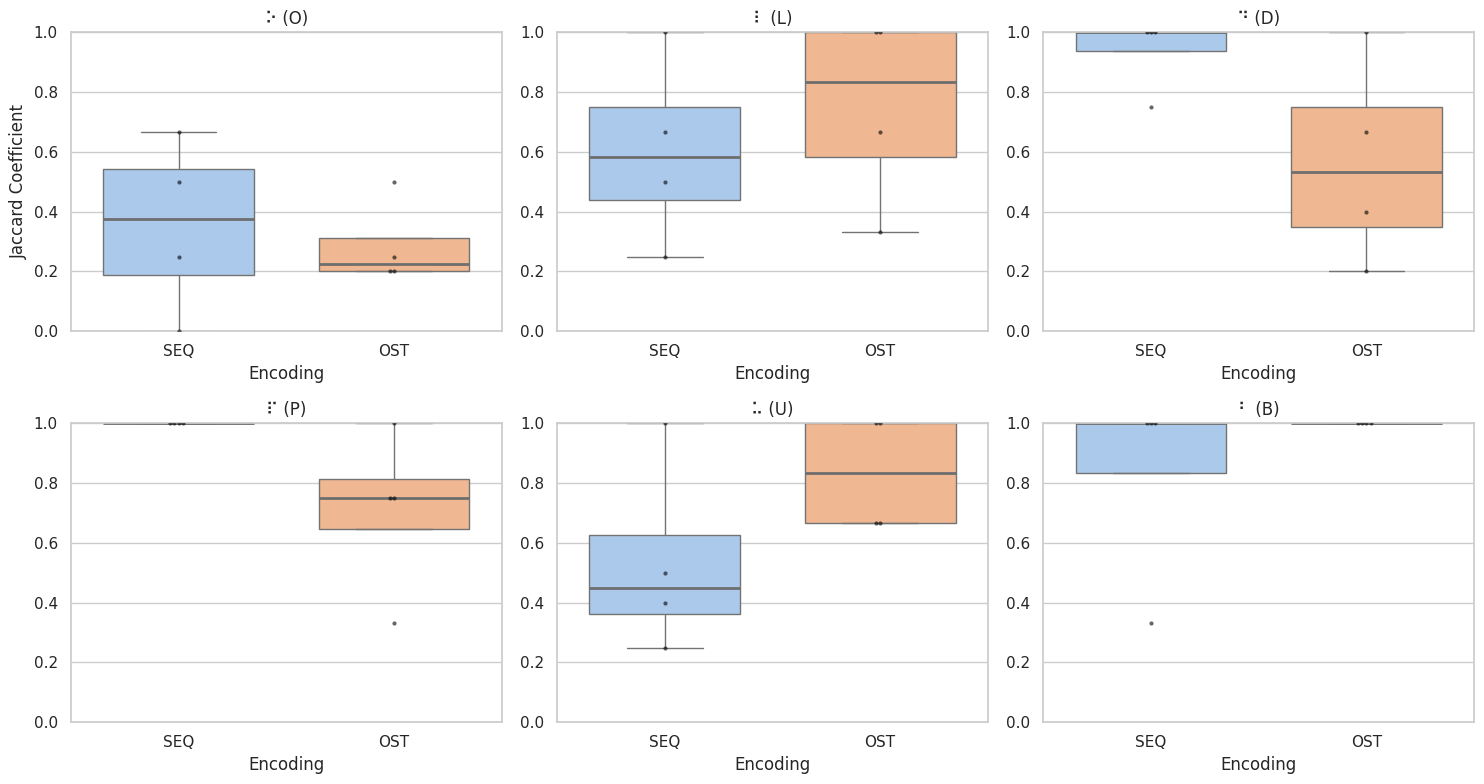

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Define pastel color palette
pastel_colors = sns.color_palette("pastel", 2)  # Only need two colors for SEQ and OST
condition_palette = {
    "SEQ": pastel_colors[0],
    "OST": pastel_colors[1]
}

def printBoxplots(data, score="jaccard_coefficient", plots=3):
    """
    Plot boxplots for each 'Test' condition in a 2x3 grid layout,
    and perform statistical tests on the data, including calculating effect size.

    Parameters:
        data (pd.DataFrame): DataFrame containing the results.
        score (str): The score column to plot (e.g., 'jaccard_coefficient' or 'dice_coefficient').
    """
    # Extract relevant columns for plotting
    pivot_df = data[['Test', 'Condition', score]]
    pivot_df['Condition'] = pivot_df['Condition'].map({
        "O": 'OST',  # map the original condition to OST
        "S": 'SEQ'   # map the original condition to SEQ
    })

    # Define the order for the 'Condition' column (SEQ first, OST second)
    condition_order = ['SEQ', 'OST']

    # Define the order for the 'Test' column (specific order as requested)
    order = ["o", "l", "d", "p", "u", "b"] if score == "jaccard_coefficient" else ["old", "pub"]

    # Set up the plotting environment (2x3 grid layout)
    plt.figure(figsize=(15, 8))  # Adjust figsize for 2 rows and 3 columns
    sns.set(style="whitegrid")

    # Loop over the specified order and plot each one as a separate subplot
    for i, test in enumerate(order):
        cols = 1 if plots == 2 else 2  # 2 columns for 2 plots, 3 columns for 3 plots
        plt.subplot(cols, plots, i + 1)  # Create a 2x3 grid of subplots (2 rows, 3 columns)

        # Filter data for the current test
        test_data = pivot_df[pivot_df['Test'] == test]

        # Plot the boxplot for the current test
        ax = sns.boxplot(
            x='Condition',
            y=score,
            data=test_data,
            showfliers=False,
            hue='Condition',  # Explicitly assign 'Condition' to hue
            palette=condition_palette,
            width=0.7,
            dodge=False,  # Keep all conditions in the same box plot
            order=condition_order,  # Ensure SEQ comes before OST
            medianprops={'color': '#6E6E6E', 'linewidth': 2}
        )

        # Overlay the swarmplot on top of the boxplot
        sns.swarmplot(
            x='Condition',
            y=score,
            data=test_data,
            color='black',  # Set color for the data points in the swarmplot
            alpha=0.6,  # Adjust transparency of data points
            size=3,  # Adjust the size of the points
            dodge=False  # Keep all conditions together
        )

        # Customize the plot for the current test
        plt.title(braille_character[test], fontsize=12)
        plt.xlabel('Encoding')
        if i == 0:
            plt.ylabel(score.replace('_', ' ').title())  # Add y-axis label for the first plot
        else:
            plt.ylabel('')  # Remove y-axis label for other plots

        # Set the y-axis range from 0 to 1
        plt.ylim(0, 1)

        # Perform statistical tests
        condition_1_data = test_data[test_data['Condition'] == "SEQ"][score]
        condition_2_data = test_data[test_data['Condition'] == "OST"][score]

        # Check variances using Levene's test
        levene_p_value = check_variances(condition_1_data, condition_2_data)
        print(f"Levene's Test p-value for {test}: {levene_p_value:.3f}")

        # Check normality using Shapiro-Wilk test
        seq_normality_p, ost_normality_p = check_normality(condition_1_data, condition_2_data)
        print(f"Shapiro-Wilk Test p-values for {test} - SEQ: {seq_normality_p:.3f}, OST: {ost_normality_p:.3f}")

        # Based on test results, select the appropriate statistical test
        u_stat, p_value = perform_mannwhitneyu(condition_1_data, condition_2_data)
        print(f"Mann-Whitney U test for {test}: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}")

        # Calculate Cohen's d (Effect Size)
        effect_size = calculate_cohens_d(condition_1_data, condition_2_data)
        print(f"Cohen's d for {test}: {effect_size:.3f}")

        # Interpretation of p-value
        if p_value < 0.05:
            print(f"Significant difference found for {test}!\n")
        else:
            print(f"No significant difference for {test}.\n")

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig(f'/content/learn_{score}.pdf', format='pdf')

def check_variances(seq_data_question, ost_data_question):
    # Levene's Test for equality of variances
    stat, p_value = stats.levene(seq_data_question, ost_data_question)
    print(f"levene: stat= {stat:.4f}, p_value= {p_value:.4f}")
    return p_value

def check_normality(seq_data_question, ost_data_question):
    # Shapiro-Wilk test for normality
    seq_normality_p = stats.shapiro(seq_data_question).pvalue
    ost_normality_p = stats.shapiro(ost_data_question).pvalue
    return seq_normality_p, ost_normality_p

def perform_mannwhitneyu(seq_data_question, ost_data_question):
    # Perform Mann-Whitney U test (Non-parametric test)
    u_stat, p_value = stats.mannwhitneyu(seq_data_question, ost_data_question)
    return u_stat, p_value

def calculate_cohens_d(seq_data, ost_data):
    """ Calculate Cohen's d for effect size between two independent samples """
    # Calculate the mean and standard deviation for both groups
    mean_1, mean_2 = np.mean(seq_data), np.mean(ost_data)
    std_1, std_2 = np.std(seq_data, ddof=1), np.std(ost_data, ddof=1)

    # Calculate pooled standard deviation
    pooled_std = np.sqrt(((std_1 ** 2) + (std_2 ** 2)) / 2)

    # Cohen's d formula
    d = (mean_1 - mean_2) / pooled_std

    # Return absolute value of Cohen's d (if needed)
    return abs(d)

def jaccard_word_score(word:str, test_word:str):
  if len(test_word) != len(word.split()):
    return 0
  return sum(jaccard(w, t) for w, t in zip(word.split(), test_word))/len(test_word)

# Example usage
so_test_df = dataframe_so[dataframe_so['Test'].isin(['old', 'pub'])]  # sort out the learning
os_test_df = dataframe_os[dataframe_os['Test'].isin(['old', 'pub'])]  # sort out the learning

so_test_df.loc[:, "jaccard_word_score"] = so_test_df.apply(lambda row: jaccard_word_score(row["Submitted Value"], row["Test"]), axis=1)
os_test_df.loc[:, "jaccard_word_score"] = os_test_df.apply(lambda row: jaccard_word_score(row["Submitted Value"], row["Test"]), axis=1)

so_test_max_jaccard = so_test_df.loc[so_test_df.groupby(['Participant', 'Test'])['jaccard_word_score'].idxmax()]
os_test_max_jaccard = os_test_df.loc[os_test_df.groupby(['Participant', 'Test'])['jaccard_word_score'].idxmax()]

mergedData = pd.concat([so_max_jaccard, os_max_jaccard])
mergedData[['Condition', 'Test', 'jaccard_coefficient']]

mergedTestData = pd.concat([so_test_max_jaccard, os_test_max_jaccard])

print("Wilcoxon signed rank test for the learning process")
printBoxplots(mergedData)



Wilcoxon signed rank test for the testing process
levene: stat= 0.0581, p_value= 0.8176
Levene's Test p-value for old: 0.818
Shapiro-Wilk Test p-values for old - SEQ: 0.465, OST: 0.900
Mann-Whitney U test for old: U-statistic = 8.500, p-value = 1.000
Cohen's d for old: 0.103
No significant difference for old.



<ipython-input-21-15bac01dbb18>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['Condition'] = pivot_df['Condition'].map({


levene: stat= 2.0833, p_value= 0.1990
Levene's Test p-value for pub: 0.199
Shapiro-Wilk Test p-values for pub - SEQ: 0.787, OST: 0.279
Mann-Whitney U test for pub: U-statistic = 6.500, p-value = 0.770
Cohen's d for pub: 0.211
No significant difference for pub.



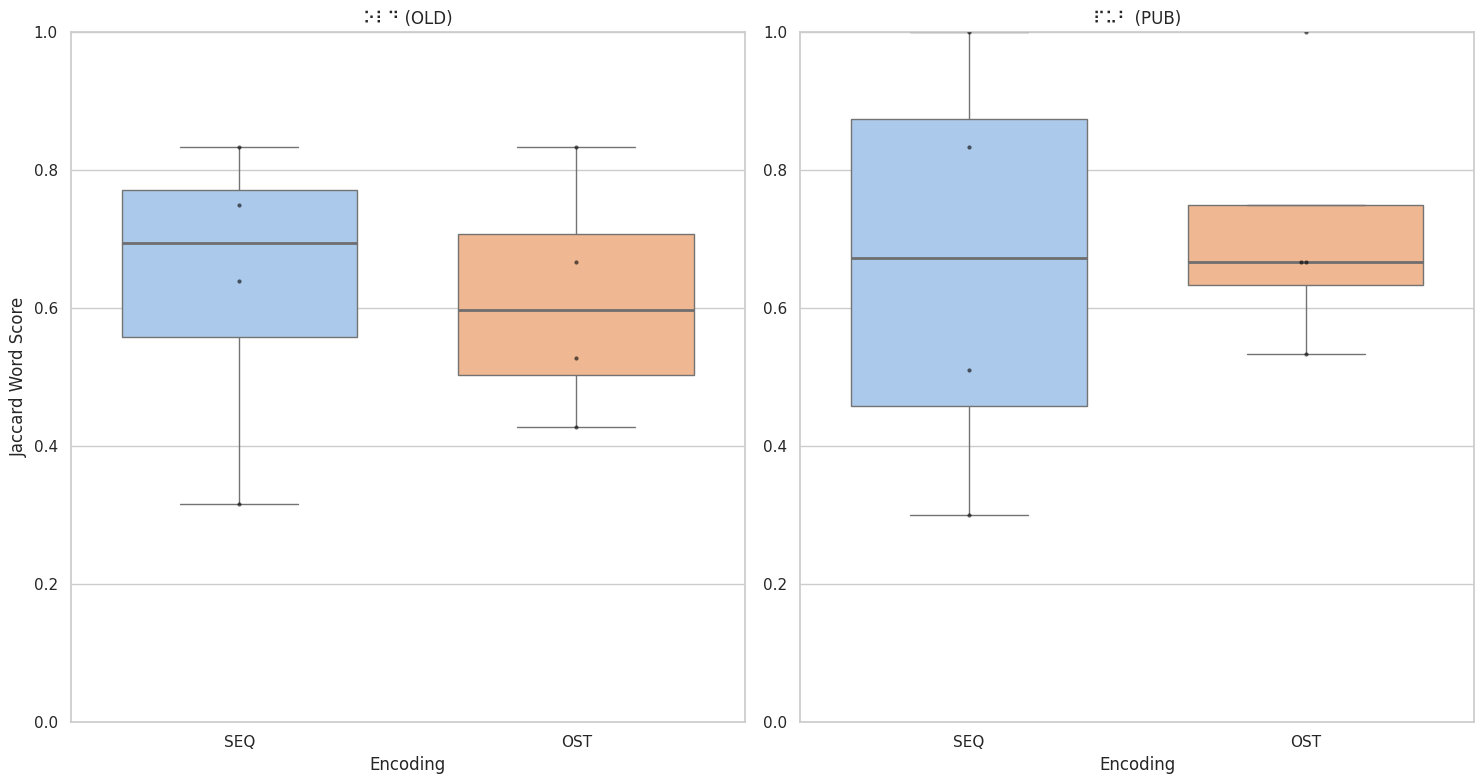

In [ ]:
print("\nWilcoxon signed rank test for the testing process")
printBoxplots(mergedTestData, "jaccard_word_score", plots = 2)

## new

In [ ]:
compareCharacters = []

def get_TP(submitted_value, tested_character):
  return len(set(submitted_value) & setMapper[tested_character])

def get_FP(submitted_value, tested_character):
  return len(set(submitted_value) - setMapper[tested_character])

def get_FN(submitted_value, tested_character):
  return len(setMapper[tested_character] - set(submitted_value))

def precision(submitted_value, tested_character):
  return get_TP(submitted_value, tested_character) / (get_TP(submitted_value, tested_character) + get_FP(submitted_value, tested_character))

def recall(submitted_value, tested_character):
  return get_TP(submitted_value, tested_character) / (get_TP(submitted_value, tested_character) + get_FN(submitted_value, tested_character))

def f1_score(submitted_value, tested_character):
  prec = precision(submitted_value, tested_character)
  rec = recall(submitted_value, tested_character)

  divisor = prec + rec

  if divisor == 0:
    return 0
  else:
    return 2 * (prec * rec) / divisor


def testFunction(value, test, condition):

  tmp = [(f1_score(submitted_value, tested_character), precision(submitted_value, tested_character), recall(submitted_value, tested_character), get_TP(submitted_value, tested_character), get_FP(submitted_value, tested_character),
         set(submitted_value), setMapper[tested_character],
         (setMapper[tested_character]-set(submitted_value)), (set(submitted_value)-setMapper[tested_character]), tested_character, condition, jaccard(submitted_value, tested_character))
  for submitted_value, tested_character in zip(value.split(), test)]

  compareCharacters.extend(tmp)

so_test_max_jaccard.apply(lambda row: testFunction(row["Submitted Value"], row["Test"], row["Condition"]), axis=1)
os_test_max_jaccard.apply(lambda row: testFunction(row["Submitted Value"], row["Test"], row["Condition"]), axis=1)

columns = ['F1', 'precision', 'recall', 'TP', 'FP', 'Submitted Value', 'Ground Truth', 'Missed Character', 'Surplus Character', 'Tested Character', 'Condition', 'Jaccard Score']
df = pd.DataFrame(compareCharacters, columns=columns)
df[['Condition', 'Tested Character', 'Missed Character', 'Ground Truth', 'Surplus Character',"Submitted Value", 'F1']]

,Condition,Tested Character,Missed Character,Ground Truth,Surplus Character,Submitted Value,F1
0,S,o,{},"{f, k, s}",{},"{f, k, s}",1.000000
1,S,l,"{d, f}","{d, f, s}",{l},"{l, s}",0.400000
2,S,d,{},"{j, f, k}",{},"{j, f, k}",1.000000
3,O,p,"{d, s}","{d, j, f, s}",{},"{j, f}",0.666667
4,O,u,{l},"{l, f, s}",{k},"{f, k, s}",0.666667
5,O,b,{},"{d, f}",{},"{d, f}",1.000000
6,S,o,"{k, s}","{f, k, s}",{j},"{j, f}",0.400000
7,S,l,{s},"{d, f, s}",{},"{d, f}",0.800000
8,S,d,{},"{j, f, k}",{},"{j, f, k}",1.000000
9,O,p,"{d, s}","{d, j, f, s}",{},"{j, f}",0.666667


In [ ]:
df

levene: stat= 1.0490, p_value= 0.3453
Levene's Test p-value for o: 0.345
Shapiro-Wilk Test p-values for o - SEQ: 0.299, OST: 0.100
Mann-Whitney U test for o: U-statistic = 9.000, p-value = 0.881
Cohen's d for o: 0.443
No significant difference for o.

levene: stat= 0.1250, p_value= 0.7358
Levene's Test p-value for l: 0.736
Shapiro-Wilk Test p-values for l - SEQ: 0.274, OST: 0.272
Mann-Whitney U test for l: U-statistic = 4.500, p-value = 0.369
Cohen's d for l: 0.609
No significant difference for l.

levene: stat= 0.0222, p_value= 0.8864
Levene's Test p-value for d: 0.886
Shapiro-Wilk Test p-values for d - SEQ: 0.001, OST: 0.911
Mann-Whitney U test for d: U-statistic = 11.000, p-value = 0.439
Cohen's d for d: 0.634
No significant difference for d.

levene: stat= 0.0000, p_value= 1.0000
Levene's Test p-value for p: 1.000
Shapiro-Wilk Test p-values for p - SEQ: 0.001, OST: 0.062
Mann-Whitney U test for p: U-statistic = 11.000, p-value = 0.436
Cohen's d for p: 0.875
No significant differenc

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


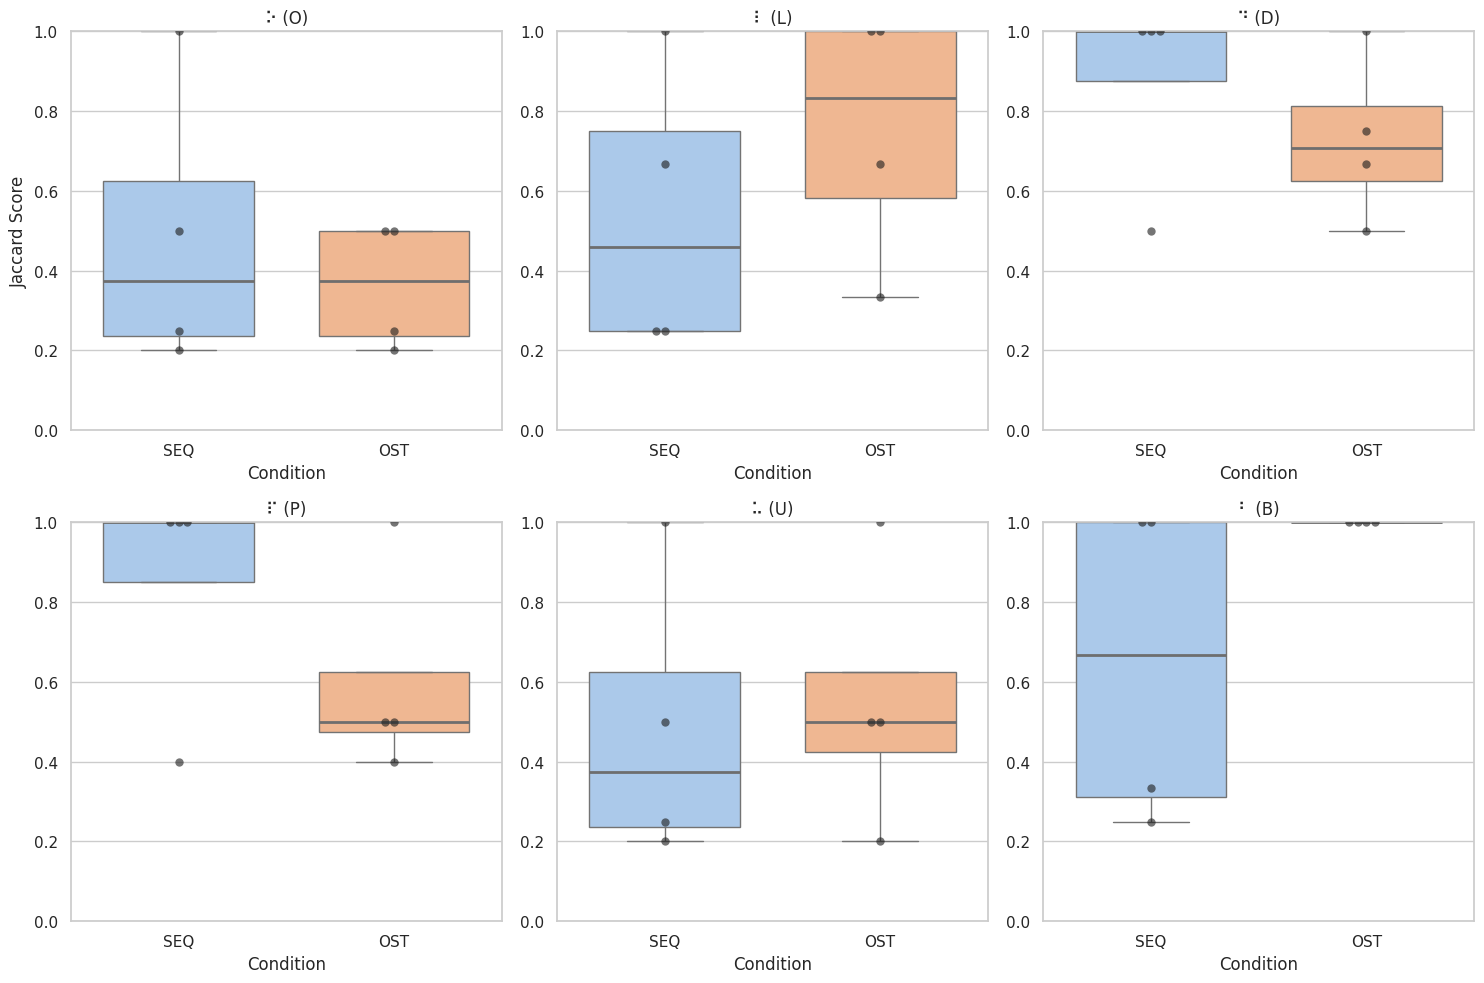

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df, score="F1"):
    """
    Plot boxplots for each 'Tested Character' condition as individual subplots arranged in a 3x3 grid.
    Each subplot will show the distribution of the F1 score for the 'Tested Character' under different conditions,
    along with a swarm plot for individual data points.

    Parameters:
        df (pd.DataFrame): DataFrame containing the results.
        score (str): The score column to plot (e.g., 'F1').
    """
    # Set up the plotting environment (3x3 grid layout)
    tested_characters = df['Tested Character'].unique()
    df['Condition'] = df['Condition'].map({
        "O": 'OST',  # map the original condition to OST
        "S": 'SEQ'   # map the original condition to SEQ
    })
    num_plots = len(tested_characters)
    # grid_size = 3  # We are using a fixed 3x3 grid layout as per your request
    condition_order = ['SEQ', 'OST']

    # Define the order for the 'Test' column (specific order as requested)
    order = ["o", "l", "d", "p", "u", "b"] if score == "jaccard_coefficient" else ["old", "pub"]

    plt.figure(figsize=(15, 10))  # Adjust figsize for a 3x3 grid
    sns.set(style="whitegrid")

    # Loop over the unique 'Tested Character' values and plot each one as a separate subplot
    for i, tested_char in enumerate(tested_characters[:9]):  # Ensure no more than 9 plots for 3x3 grid
        plt.subplot(2, 3, i + 1)  # Create a 3x3 grid of subplots

        # Filter data for the current 'Tested Character'
        char_data = df[df['Tested Character'] == tested_char]

        # Plot the boxplot for the current 'Tested Character'
        sns.boxplot(
            x='Condition',
            y=score,
            data=char_data,
            showfliers=False,  # Hide outliers
            hue='Condition',  # Differentiate by Condition
            order=condition_order,  # Order the conditions
            width=0.7,
            dodge=False,  # Keep all conditions together
            palette=condition_palette,  # Custom color palette
            medianprops={'color': '#6E6E6E', 'linewidth': 2}
        )

        # Overlay the swarm plot
        sns.swarmplot(
            x='Condition',
            y=score,
            data=char_data,
            color='k',  # Color the individual points in black for contrast
            alpha=0.6,  # Slight transparency for the swarm plot points
            size=6  # Adjust the size of the points if necessary
        )

        # Customize the plot for the current 'Tested Character'
        plt.title(f"{braille_character[tested_char]}", fontsize=12)
        plt.xlabel('Condition')
        if i == 0:
            plt.ylabel(f'{score}')  # Add y-axis label for the first plot
        else:
            plt.ylabel('')  # Remove y-axis label for other plots

        # Set the y-axis range from 0 to 1
        plt.ylim(0, 1)
        # Perform statistical tests


        condition_1_data = char_data[char_data['Condition'] == "SEQ"][score]
        condition_2_data = char_data[char_data['Condition'] == "OST"][score]

        # Check variances using Levene's test
        levene_p_value = check_variances(condition_1_data, condition_2_data)
        print(f"Levene's Test p-value for {tested_char}: {levene_p_value:.3f}")

        # Check normality using Shapiro-Wilk test
        seq_normality_p, ost_normality_p = check_normality(condition_1_data, condition_2_data)
        print(f"Shapiro-Wilk Test p-values for {tested_char} - SEQ: {seq_normality_p:.3f}, OST: {ost_normality_p:.3f}")

        # Based on test results, select the appropriate statistical test
        u_stat, p_value = perform_mannwhitneyu(condition_1_data, condition_2_data)
        print(f"Mann-Whitney U test for {tested_char}: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}")

        # Calculate Cohen's d (Effect Size)
        effect_size = calculate_cohens_d(condition_1_data, condition_2_data)
        print(f"Cohen's d for {tested_char}: {effect_size:.3f}")

        # Interpretation of p-value
        if p_value < 0.05:
            print(f"Significant difference found for {tested_char}!\n")
        else:
            print(f"No significant difference for {tested_char}.\n")

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig(f'/content/test.pdf', format='pdf')


# Example usage
# Assuming df contains the relevant data
plot_boxplots(df.copy(), score="Jaccard Score")


In [ ]:
df

<ipython-input-25-74fc2dc6a4c3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_data['Missed Character'] = condition_data['Missed Character'].apply(lambda x: list(x) if isinstance(x, str) else x)
<ipython-input-25-74fc2dc6a4c3>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_data['Surplus Character'] = condition_data['Surplus Character'].apply(lambda x: list(x) if isinstance(x, str) else x)
<ipython-input-25-74fc2dc6a4c3>:43: SettingWithCopyWarning: 
A value is trying to be set on a 

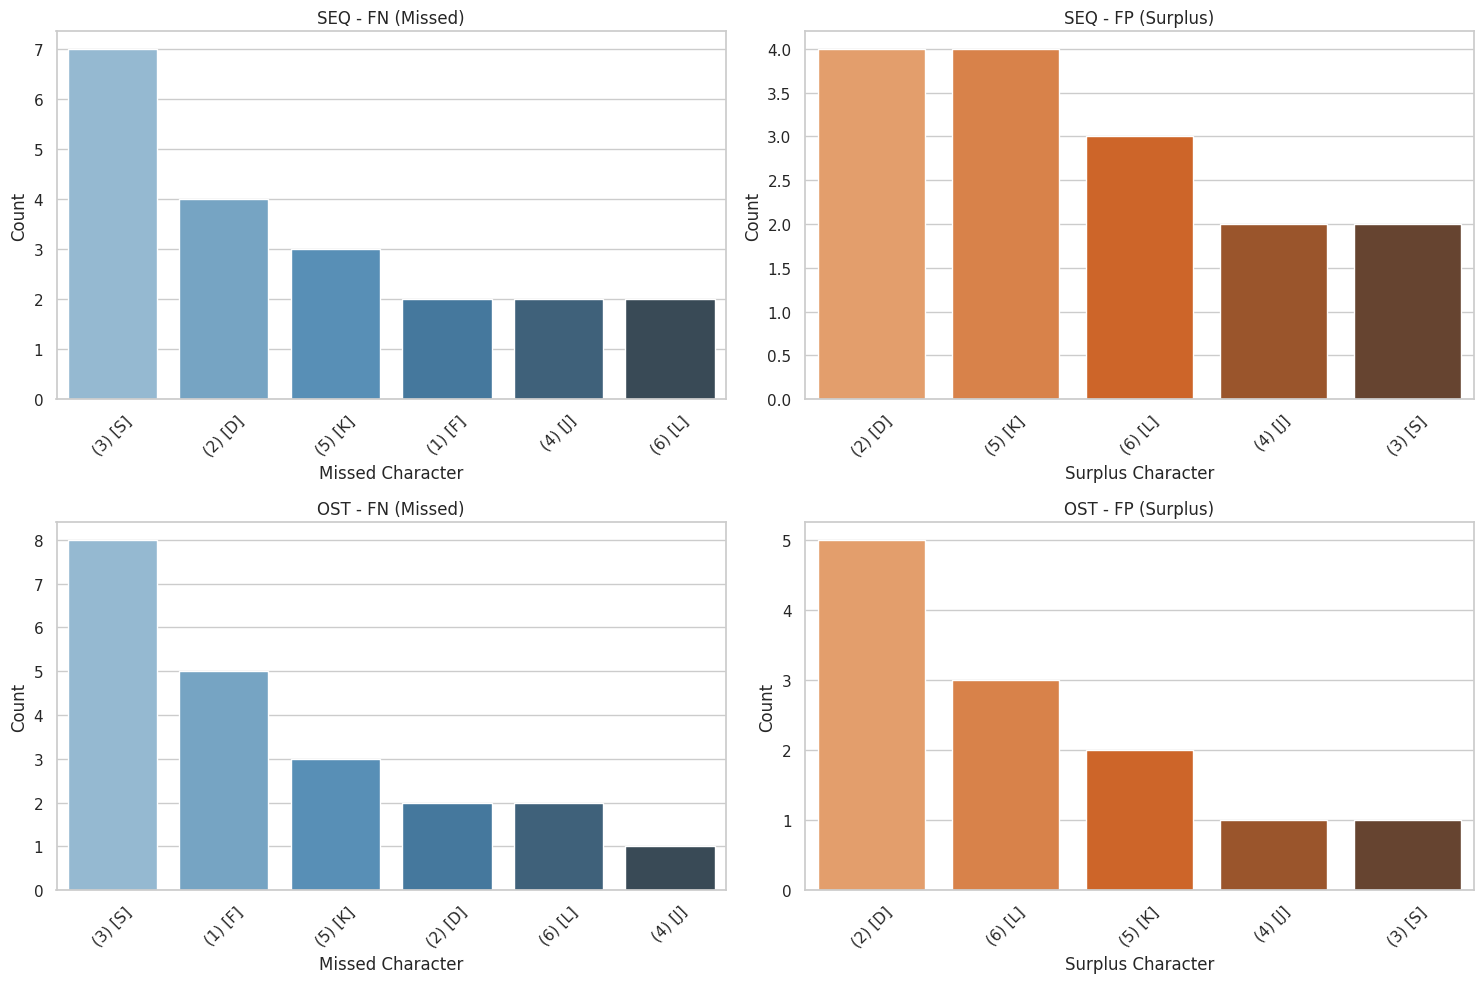

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numbers_encoding = {
    'f': '(1) [F]',
    'd': '(2) [D]',
    's': '(3) [S]',
    'j': '(4) [J]',
    'k': '(5) [K]',
    'l': '(6) [L]'
}

def plot_character_counts(df):
    """
    Plot bar charts for 'Tested Character' and 'Surplus Character' counts per 'Condition'.

    Parameters:
        df (pd.DataFrame): DataFrame containing the 'Condition', 'Tested Character', 'Surplus Character' columns.
    """
    # Prepare the plotting environment
    df['Condition'] = df['Condition'].map({
        "O": 'OST',  # map the original condition to OST
        "S": 'SEQ'   # map the original condition to SEQ
    })
    conditions = df['Condition'].unique()
    num_conditions = len(conditions)

    # Set up the plotting environment (one row, multiple columns based on number of conditions)
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Loop over each condition and create a subplot
    for i, condition in enumerate(conditions):
        # Filter data for the current condition
        condition_data = df[df['Condition'] == condition]

        # First, apply explode to ensure you're working with individual characters
        condition_data['Missed Character'] = condition_data['Missed Character'].apply(lambda x: list(x) if isinstance(x, str) else x)
        condition_data['Surplus Character'] = condition_data['Surplus Character'].apply(lambda x: list(x) if isinstance(x, str) else x)

        # Now map the encoding dictionary to the exploded data
        condition_data['Missed Character'] = condition_data['Missed Character'].apply(lambda x: [numbers_encoding.get(c, c) for c in x])
        condition_data['Surplus Character'] = condition_data['Surplus Character'].apply(lambda x: [numbers_encoding.get(c, c) for c in x])

        # Then explode and calculate the value counts
        tested_char_counts = condition_data['Missed Character'].explode().value_counts()
        surplus_char_counts = condition_data['Surplus Character'].explode().value_counts()



        # Plot for Tested Character counts
        plt.subplot(num_conditions, 2, i * 2 + 1)  # 2 columns, 1st column for Tested Characters
        sns.barplot(x=tested_char_counts.index, y=tested_char_counts.values, palette="Blues_d")
        plt.title(f"{condition} - FN (Missed)")
        plt.xlabel('Missed Character')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Plot for Surplus Character counts
        plt.subplot(num_conditions, 2, i * 2 + 2)  # 2nd column for Surplus Characters
        sns.barplot(x=surplus_char_counts.index, y=surplus_char_counts.values, palette="Oranges_d")
        plt.title(f"{condition} - FP (Surplus)")
        plt.xlabel('Surplus Character')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.savefig(f'/content/sjkne_{condition.upper()}.pdf', format='pdf')

# Example usage:
# Assuming df contains the relevant data
plot_character_counts(df[['Condition', 'Tested Character', 'Missed Character', 'Surplus Character', 'F1']].copy())

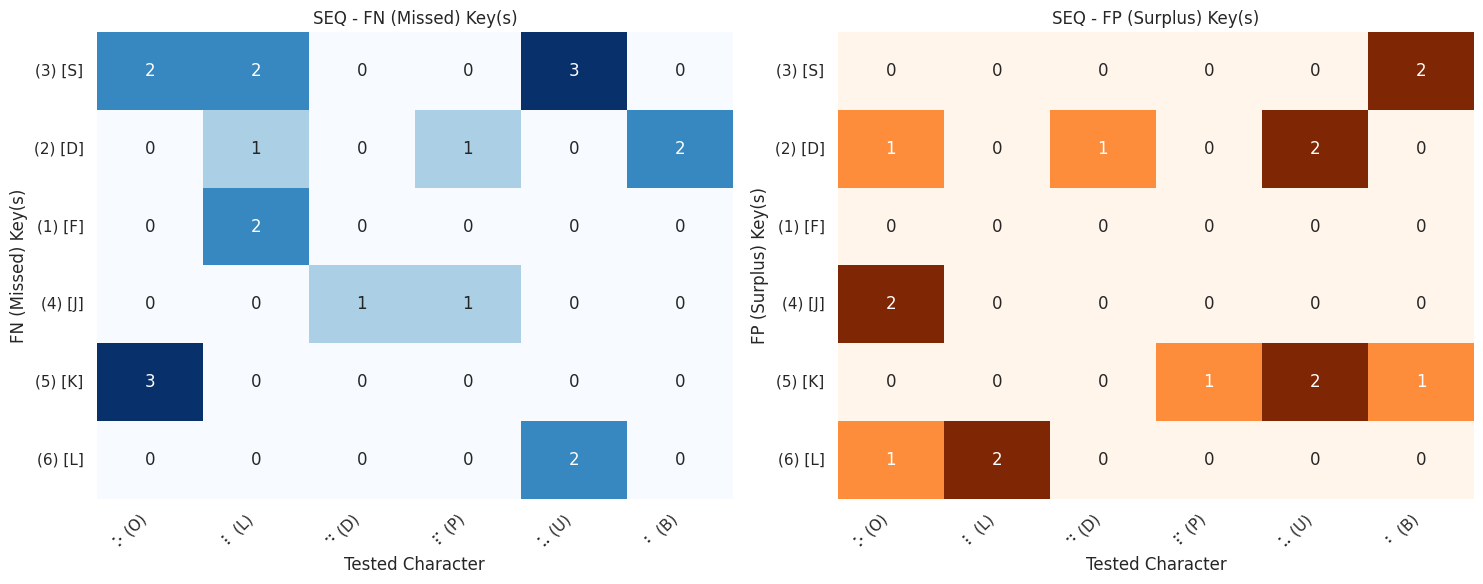

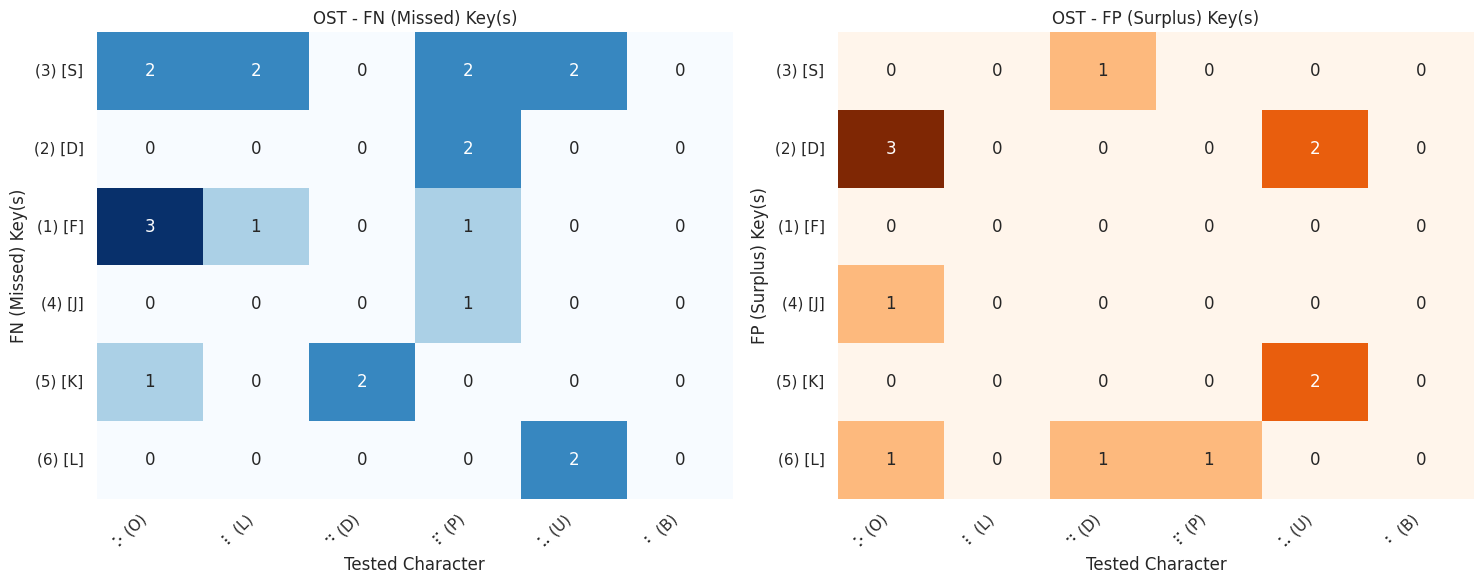

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_character_correlations_by_condition(df):
    """
    Plot correlation matrices for each condition, showing the relationship between the 'Tested Character'
    and the 'Missed Character' and 'Surplus Character'.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Condition', 'Tested Character',
                           'Missed Character', 'Surplus Character' columns.
    """
    # Define the characters that can appear in the 'Missed' and 'Surplus' sets
    missed_surplus_chars = ["s", "d", "f", "j", "k", "l"]
    tested_chars = ["o", "l", "d", "p", "u", "b"]
    df['Condition'] = df['Condition'].map({
        "O": 'OST',  # map the original condition to OST
        "S": 'SEQ'   # map the original condition to SEQ
    })
    # Group the data by 'Condition'
    conditions = df['Condition'].unique()

    for condition in conditions:
        # Filter the dataframe for the current condition
        condition_df = df[df['Condition'] == condition]

        # Initialize dictionaries to hold the count data
        missed_char_matrix = {tested_char: {missed_char: 0 for missed_char in missed_surplus_chars} for tested_char in tested_chars}
        surplus_char_matrix = {tested_char: {surplus_char: 0 for surplus_char in missed_surplus_chars} for tested_char in tested_chars}

        # Loop through each row in the filtered dataframe to count the occurrences
        for _, row in condition_df.iterrows():
            tested_character = row['Tested Character']

            # Count occurrences of Missed Characters
            missed_chars = row['Missed Character']  # This is a set
            for missed_char in missed_chars:
                if missed_char in missed_surplus_chars:
                    missed_char_matrix[tested_character][missed_char] += 1

            # Count occurrences of Surplus Characters
            surplus_chars = row['Surplus Character']  # This is a set
            for surplus_char in surplus_chars:
                if surplus_char in missed_surplus_chars:
                    surplus_char_matrix[tested_character][surplus_char] += 1

        # Convert the count matrices to DataFrames for plotting
        missed_char_df = pd.DataFrame(missed_char_matrix)
        surplus_char_df = pd.DataFrame(surplus_char_matrix)

        # Map the characters to Braille or numbers
        missed_char_df = missed_char_df.rename(index=braille_character, columns=braille_character)
        surplus_char_df = surplus_char_df.rename(index=braille_character, columns=braille_character)

        # Modify y-axis to use the numbers encoding
        missed_char_df = missed_char_df.rename(index=numbers_encoding)
        surplus_char_df = surplus_char_df.rename(index=numbers_encoding)


        # Plot the correlation matrices for this condition
        plt.figure(figsize=(15, 6))

        # First subplot: Correlation between Tested and Missed Characters
        plt.subplot(1, 2, 1)
        sns.heatmap(missed_char_df, annot=True, cmap="Blues", fmt="d", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FN (Missed) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FN (Missed) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Second subplot: Correlation between Tested and Surplus Characters
        plt.subplot(1, 2, 2)
        sns.heatmap(surplus_char_df, annot=True, cmap="Oranges", fmt="d", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FP (Surplus) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FP (Surplus) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Adjust layout and show the plots
        plt.tight_layout()
        plt.savefig(f'/content/sjksdfsfne_{condition.upper()}.pdf', format='pdf')

# Example usage:
# Assuming df contains the relevant data
plot_character_correlations_by_condition(df[['Condition', 'Tested Character', 'Missed Character', 'Surplus Character']].copy())


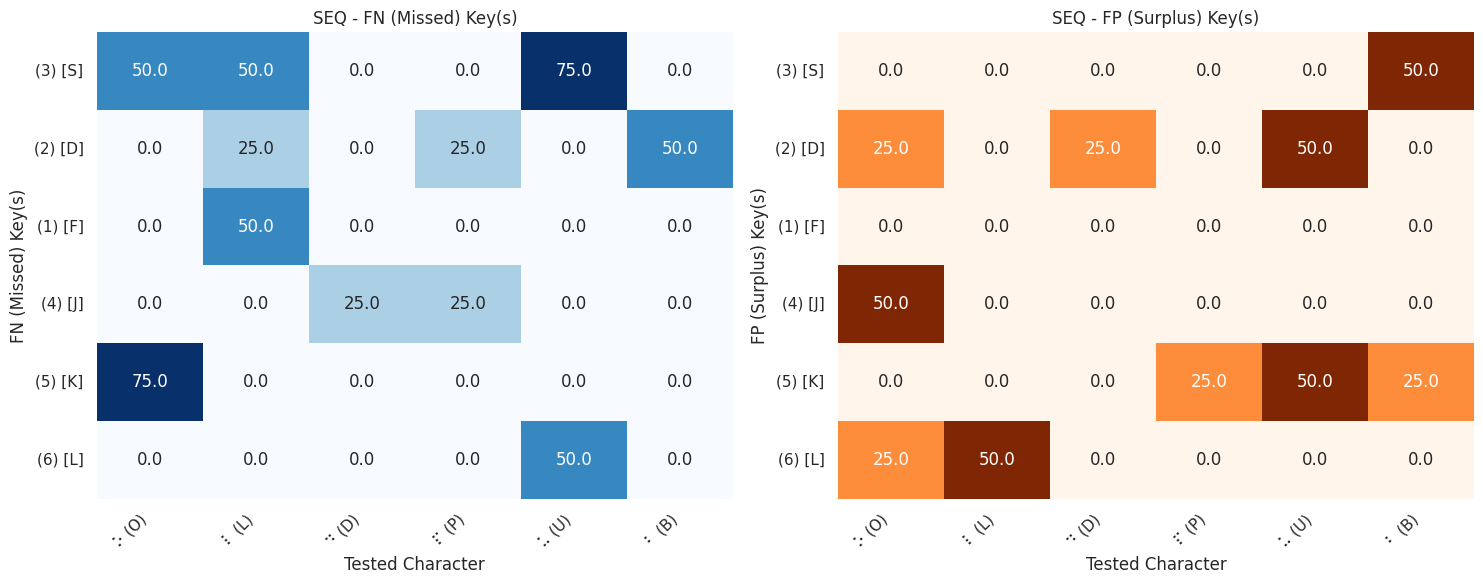

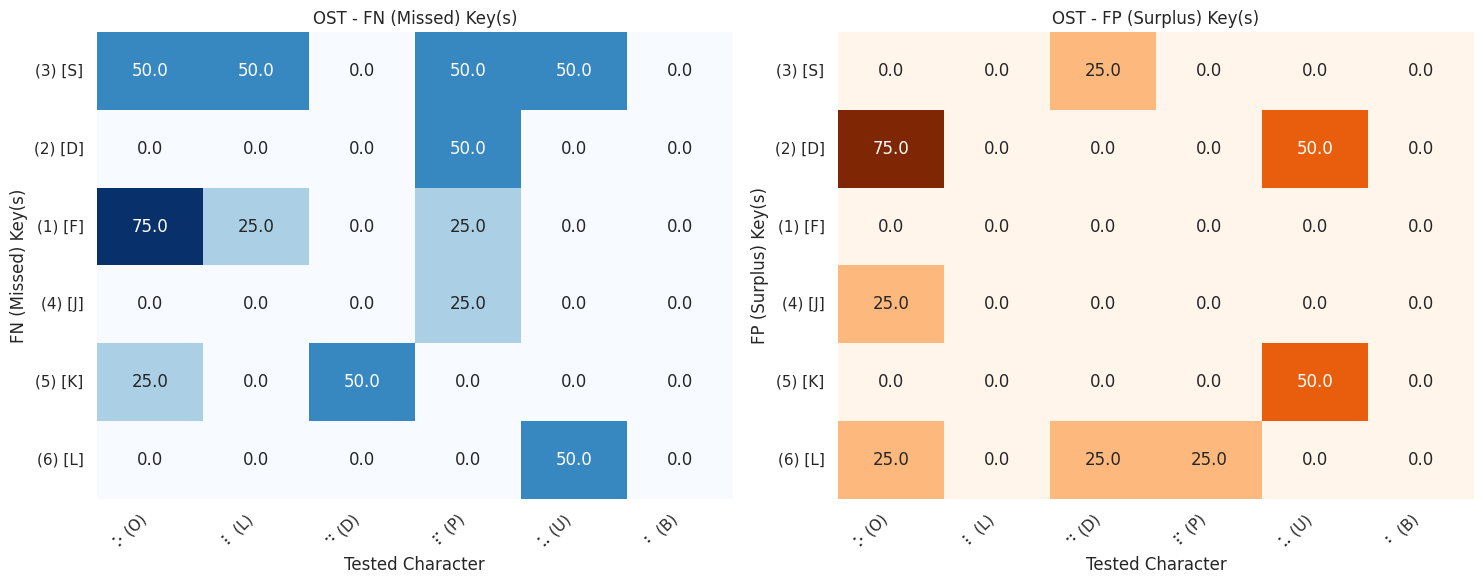

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_character_correlations_by_condition(df):
    """
    Plot correlation matrices for each condition, showing the relationship between the 'Tested Character'
    and the 'Missed Character' and 'Surplus Character' with percentage values.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Condition', 'Tested Character',
                           'Missed Character', 'Surplus Character' columns.
    """
    # Define the characters that can appear in the 'Missed' and 'Surplus' sets
    missed_surplus_chars = ["s", "d", "f", "j", "k", "l"]
    tested_chars = ["o", "l", "d", "p", "u", "b"]
    df['Condition'] = df['Condition'].map({
        "O": 'OST',  # map the original condition to OST
        "S": 'SEQ'   # map the original condition to SEQ
    })
    # Group the data by 'Condition'
    conditions = df['Condition'].unique()

    for condition in conditions:
        # Filter the dataframe for the current condition
        condition_df = df[df['Condition'] == condition]

        # Initialize dictionaries to hold the count data
        missed_char_matrix = {tested_char: {missed_char: 0 for missed_char in missed_surplus_chars} for tested_char in tested_chars}
        surplus_char_matrix = {tested_char: {surplus_char: 0 for surplus_char in missed_surplus_chars} for tested_char in tested_chars}
        total_tested_char_matrix = {tested_char: 0 for tested_char in tested_chars}

        # Loop through each row in the filtered dataframe to count the occurrences
        for _, row in condition_df.iterrows():
            tested_character = row['Tested Character']

            # Count occurrences of Missed Characters
            missed_chars = row['Missed Character']  # This is a set
            for missed_char in missed_chars:
                if missed_char in missed_surplus_chars:
                    missed_char_matrix[tested_character][missed_char] += 1

            # Count occurrences of Surplus Characters
            surplus_chars = row['Surplus Character']  # This is a set
            for surplus_char in surplus_chars:
                if surplus_char in missed_surplus_chars:
                    surplus_char_matrix[tested_character][surplus_char] += 1

            # Track the total occurrences of each Tested Character (for percentage calculation)
            total_tested_char_matrix[tested_character] += 1

        # Convert the count matrices to DataFrames for plotting
        missed_char_df = pd.DataFrame(missed_char_matrix)
        surplus_char_df = pd.DataFrame(surplus_char_matrix)

        # Calculate percentage values for each matrix
        missed_char_percentage_df = missed_char_df.copy()
        surplus_char_percentage_df = surplus_char_df.copy()

        # Loop through each row and calculate the percentage based on the total occurrences of the Tested Character
        for tested_char in tested_chars:
            total_tested_char = total_tested_char_matrix[tested_char]

            # Avoid division by zero and calculate percentage
            if total_tested_char > 0:
                missed_char_percentage_df[tested_char] = (missed_char_df[tested_char] / total_tested_char) * 100
                surplus_char_percentage_df[tested_char] = (surplus_char_df[tested_char] / total_tested_char) * 100
            else:
                missed_char_percentage_df[tested_char] = 0  # Set to 0 if no Tested Character data
                surplus_char_percentage_df[tested_char] = 0  # Set to 0 if no Tested Character data

        # Plot the correlation matrices for this condition
        plt.figure(figsize=(15, 6))

        # First subplot: Correlation between Tested and Missed Characters (Percentage)
        plt.subplot(1, 2, 1)
        sns.heatmap(missed_char_percentage_df, annot=True, cmap="Blues", fmt=".1f", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FN (Missed) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FN (Missed) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Second subplot: Correlation between Tested and Surplus Characters (Percentage)
        plt.subplot(1, 2, 2)
        sns.heatmap(surplus_char_percentage_df, annot=True, cmap="Oranges", fmt=".1f", cbar=False,
                    xticklabels=[braille_character.get(c, c) for c in tested_chars],
                    yticklabels=[numbers_encoding.get(c, c) for c in missed_surplus_chars])
        plt.title(f'{condition} - FP (Surplus) Key(s)')
        plt.xlabel('Tested Character')
        plt.ylabel('FP (Surplus) Key(s)')

        # Rotate the axis labels to avoid overlap
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)

        # Adjust layout and show the plots
        plt.tight_layout()
        plt.savefig(f'/content/percent_{condition.upper()}.pdf', format='pdf')


# Example usage:
# Assuming df contains the relevant data
plot_character_correlations_by_condition(df[['Condition', 'Tested Character', 'Missed Character', 'Surplus Character']].copy())


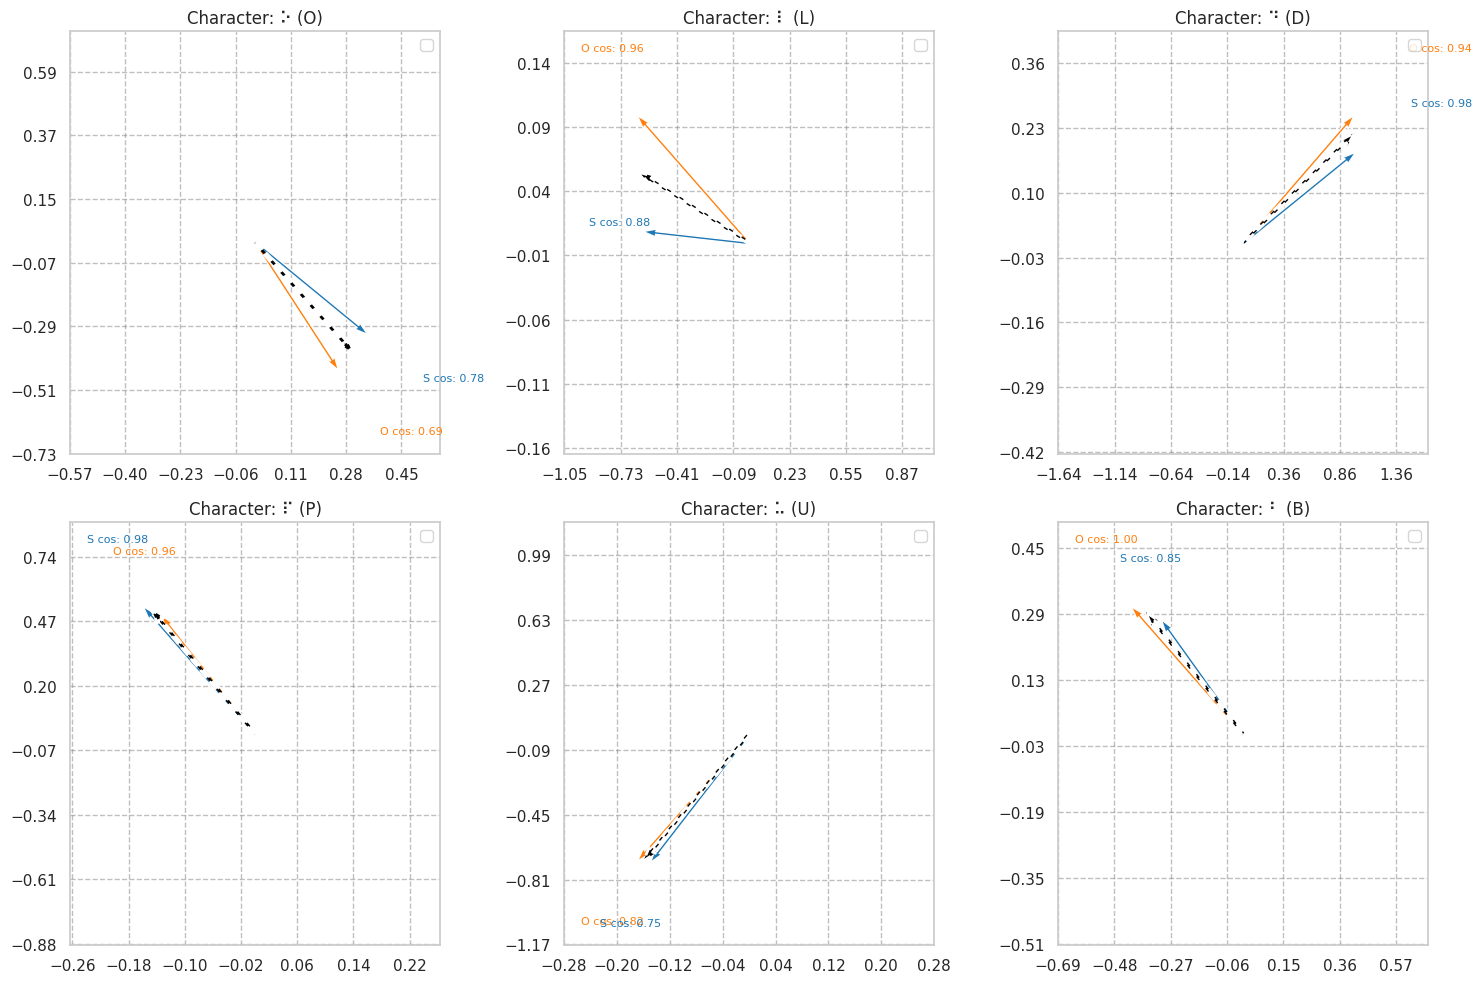

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

def one_hot_encode_submitted_value(df):
    """
    One-hot encode the 'Submitted Value' column in the dataframe.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Condition', 'Submitted Value', 'Ground Truth' columns.

    Returns:
        pd.DataFrame: DataFrame with one-hot encoded 'Submitted Value'.
    """
    # Define the possible values for 'Submitted Value'
    possible_values = ["s", "d", "f", "j", "k", "l"]

    for value in possible_values:
        df[f"Submitted_Value_{value}"] = df['Submitted Value'].apply(lambda x: 1 if value in x else 0)
    for value in possible_values:
        df[f"Ground_Truth_{value}"] = df['Ground Truth'].apply(lambda x: 1 if value in x else 0)
    return df

def plot_pca_for_grouped_data(df_encoded):
    """
    Plot PCA visualization for one-hot encoded 'Submitted Value' and 'Ground Truth' vectors, with labels for each condition,
    and create plots for each 'Tested Character' in a 3x3 grid. Vectors with the same 'Tested Character'
    and 'Condition' are merged and averaged.

    Parameters:
        df_encoded (pd.DataFrame): DataFrame containing 'Submitted Value', 'Ground Truth', 'Tested Character', 'Condition',
                                   and one-hot encoded columns for 'Submitted_Value_s', 'Submitted_Value_d',
                                   'Submitted_Value_f', 'Submitted_Value_j', 'Submitted_Value_k', 'Submitted_Value_l',
                                   'Ground_Truth_s', 'Ground_Truth_d', 'Ground_Truth_f', 'Ground_Truth_j', 'Ground_Truth_k', 'Ground_Truth_l'.
    """
    # Extract relevant columns for one-hot encoding
    one_hot_columns = ["Submitted_Value_s", "Submitted_Value_d", "Submitted_Value_f", "Submitted_Value_j", "Submitted_Value_k", "Submitted_Value_l"]
    ground_truth_columns = ["Ground_Truth_s", "Ground_Truth_d", "Ground_Truth_f", "Ground_Truth_j", "Ground_Truth_k", "Ground_Truth_l"]

    # One-hot encoding the vectors, grouping by 'Tested Character' and 'Condition'
    grouped = df_encoded.groupby(["Tested Character", "Condition"])[one_hot_columns + ground_truth_columns].mean().reset_index()

    # One-hot encoded vectors for PCA
    encodings_matrix = grouped[one_hot_columns + ground_truth_columns].values

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(encodings_matrix)

    # Create a color palette for the conditions (distinct colors)
    conditions = df_encoded['Condition'].unique()
    condition_colors = sns.color_palette("tab10", len(conditions))  # Using seaborn's color palette

    # Map each condition to a distinct color
    condition_color_map = {condition: condition_colors[i] for i, condition in enumerate(conditions)}

    # List of all tested characters
    tested_characters = ['o', 'l', 'd', 'p', 'u', 'b']

    # Create a 3x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    # Iterate over each tested character and plot the PCA for each in its respective subplot
    for i, tested_char in enumerate(tested_characters):
        ax = axes[i]

        # Filter the grouped data for the current tested character
        filtered_group = grouped[grouped['Tested Character'] == tested_char]

        # Extract PCA data for the current tested character
        encodings_matrix = filtered_group[one_hot_columns + ground_truth_columns].values
        reduced_data = pca.transform(encodings_matrix)

        # Plot the vectors for each condition in the current tested character's plot
        for j, condition in enumerate(filtered_group['Condition']):
            avg_vector = reduced_data[j]
            color = condition_color_map[condition]


            ax.quiver(0, 0, avg_vector[0], avg_vector[1], angles='xy', scale_units='xy', scale=1.5,
                      color=color, linewidth=1)

            # Calculate the cosine similarity between 'Submitted Value' vector and 'Ground Truth' vector
            submitted_value_vector = filtered_group.iloc[j][one_hot_columns].values.reshape(1, -1)
            ground_truth_vector = filtered_group.iloc[j][ground_truth_columns].values.reshape(1, -1)
            cos_sim = cosine_similarity(submitted_value_vector, ground_truth_vector)[0][0]

            # Add cosine similarity to the label
            ax.text(avg_vector[0], avg_vector[1], f"{condition.upper()} cos: {cos_sim:.2f}", fontsize=8, color=color)

        # Plot the ground truth vector (same for all conditions in the character)
        ground_truth_vector = reduced_data.mean(axis=0)  # Average vector for ground truth (since it's the same for all conditions)
        ax.quiver(0, 0, ground_truth_vector[0], ground_truth_vector[1], angles='xy', scale_units='xy', scale=1.5,
                  color='black', linewidth=2, linestyle='--', pivot='tail')

        # Set axis limits for this plot
        max_x = np.max(np.abs(reduced_data[:, 0]))
        max_y = np.max(np.abs(reduced_data[:, 1]))
        ax.set_xlim(-max_x * 1.1, max_x * 1.1)
        ax.set_ylim(-max_y * 1.1, max_y * 1.1)

        # Set custom tick marks for better visibility
        ax.set_xticks(np.arange(round(-max_x * 1.1 *100)/100, round(max_x * 1.1 * 100)/100, round(max_x/3*100)/100.0))  # Custom tick marks for x-axis
        ax.set_yticks(np.arange(round(-max_y * 1.1 *100)/100.0, round(max_y * 1.1 * 100)/100.0, round(max_y/3*100)/100.0))  # Custom tick marks for y-axis
        ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

        ax.set_title(f"Character: {braille_character[tested_char]}")



        # Add a legend
        handles, labels_legend = ax.get_legend_handles_labels()
        ax.legend(handles, labels_legend, loc='upper right')


    # Adjust layout and show the plots
    plt.tight_layout()
    plt.savefig(f'/content/vector.pdf', format='pdf')


# Apply the one-hot encoding function
df_encoded = one_hot_encode_submitted_value(df.copy())

# Call the function to plot PCA visualization
plot_pca_for_grouped_data(df_encoded)
